**Practical 3 :**

**a. Write a program to implement the naïve Bayesian classifier for a sample training data set stored as a .CSV file.** 

**Compute the accuracy of the classifier, considering 
few test data sets**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset=pd.read_csv('Fish.csv')

In [ ]:
dataset

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
print("The Different Species are :",list(dataset['Species'].unique()))

The Different Species are : ['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']


In [ ]:
print("The data for the species Bream and Perch are :")

dataframe=pd.DataFrame(dataset[dataset['Species'].isin(['Bream','Perch'])])

dataframe.index=range(len(dataframe))

dataframe

The data for the species Bream and Perch are :


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
86,Perch,1100.0,39.0,42.0,44.6,12.8002,6.8684
87,Perch,1000.0,39.8,43.0,45.2,11.9328,7.2772
88,Perch,1100.0,40.1,43.0,45.5,12.5125,7.4165
89,Perch,1000.0,40.2,43.5,46.0,12.6040,8.1420


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
scaler=StandardScaler()

dataframe.iloc[:,1:]=scaler.fit_transform(dataframe.iloc[:,1:])

xtrain,xtest,ytrain,ytest=train_test_split(dataframe.iloc[:,1:].values,dataframe['Species'].values,test_size=0.15)

In [ ]:
ytest

array(['Perch', 'Bream', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Bream', 'Perch', 'Bream', 'Perch', 'Perch'],
      dtype=object)

### Scikit Learn Implementation

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
NB_model=GaussianNB()
NB_model.fit(xtrain,ytrain)

GaussianNB()

In [ ]:
print("Training R2 score : ",NB_model.score(xtrain,ytrain))

Training R2 score :  0.8181818181818182


In [ ]:
ypred=NB_model.predict(xtest)
print("Predictions \n",ypred)

Predictions 
 ['Perch' 'Bream' 'Perch' 'Perch' 'Bream' 'Perch' 'Perch' 'Bream' 'Bream'
 'Bream' 'Perch' 'Bream' 'Perch' 'Perch']


In [ ]:
print("True Values \n",ytest)

True Values 
 ['Perch' 'Bream' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Bream' 'Perch' 'Bream' 'Perch' 'Perch']


In [ ]:
conf_mat=confusion_matrix(ytest,ypred)
print("Confusion Matrix \n",conf_mat)
print(classification_report(ytest,ypred))
print("Accuracy : " ,(conf_mat[0][0]+conf_mat[1][1])/len(ytest) )

Confusion Matrix 
 [[3 0]
 [3 8]]
              precision    recall  f1-score   support

       Bream       0.50      1.00      0.67         3
       Perch       1.00      0.73      0.84        11

    accuracy                           0.79        14
   macro avg       0.75      0.86      0.75        14
weighted avg       0.89      0.79      0.80        14

Accuracy :  0.7857142857142857


In [ ]:
probs=NB_model.predict_proba(xtest)
probs=probs[:,1]

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

In [ ]:
binarizer=LabelBinarizer()

ytest_b=binarizer.fit_transform(ytest)

fpr,tpr,_=roc_curve(ytest_b,probs)

random_probs = [0 for _ in range(len(ytest))]

p_fpr,p_tpr,_ = roc_curve(ytest_b,random_probs)

auc_score=roc_auc_score(ytest,probs)

print("AUC SCORE : " ,auc_score)

AUC SCORE :  1.0


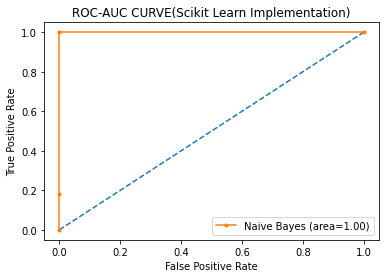

In [ ]:
plt.plot(p_fpr, p_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Naive Bayes (area=%0.2f)'% auc_score)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC-AUC CURVE(Scikit Learn Implementation)")
plt.legend()
plt.show()

### From Scratch Implementation

In [ ]:
from math import pi

class Naive_Bayes:
    def __init__(self):
        mean=None
        labels=None
        stdev=None
        prior_probs=None

    def group_by_class(self,xdata,ydata):
        self.labels=np.unique(ydata).flatten()
        self.mean=np.empty(shape=(len(self.labels),xdata.shape[1]))
        self.stdev=np.empty(shape=(len(self.labels),xdata.shape[1]))
        for i in range(len(self.labels)):
            data=np.take(xdata,np.where(ydata==self.labels[i]),axis=0)
            self.mean[i]=data.mean(axis=1)
            self.stdev[i]=data.std(axis=1)
        return self.mean,self.stdev
    
    def prior_probability(self,xdata,ydata):
        self.prior_probs=np.empty(shape=len(self.labels))
        for i in range(len(self.labels)):
            data=np.take(xdata,np.where(ydata==self.labels[i]),axis=0).reshape(-1,xdata.shape[1])
            self.prior_probs[i]=len(data)/len(ydata)
        return self.prior_probs
    
    def train(self,xdata,ydata):
        self.group_by_class(xdata,ydata)
        self.prior_probability(xdata,ydata)
                

    def estimate_likelihood(self,data):
        likelihood=np.empty(shape=(self.mean.shape))
        for i in range(len(self.labels)):
                exponent=np.exp(-((data-self.mean[i])**2/(2*self.stdev[i]**2)))
                #print("{} {}".format((1 / (np.sqrt(2 * pi) * self.stdev[i])) * exponent, self.labels[i]))
                likelihood[i] = (1 / (np.sqrt(2 * pi) * self.stdev[i])) * exponent
        return likelihood
    
    def predict(self,data):
        likelihood=self.estimate_likelihood(data)
        predicted_probs=np.empty(shape=(len(self.labels)))
        for i in range(len(self.labels)):
            predicted_probs[i]=np.prod(likelihood[i])*self.prior_probs[i]
        return predicted_probs
    
    def predict_class(self,data):
        predicted_class=np.empty(shape=len(data.reshape(-1,6)),dtype=object)
        for i in range(len(data.reshape(-1,6))):
            predicted_probs=self.predict(data[i])
            if predicted_probs[0]> predicted_probs[1]:
                predicted_class[i]=self.labels[0]
            elif predicted_probs[1]> predicted_probs[0]:
                predicted_class[i]=self.labels[1]
        return predicted_class
    
    def predict_probability(self,xdata):
        xdata=xdata.reshape(-1,6)
        predicted_probability=np.empty(shape=(len(xdata),len(self.labels)))
        for i in range(len(xdata)):
            predicted_probability[i]=self.predict(xdata[i])
        return predicted_probability

In [ ]:
xdata=xtrain;ydata=ytrain;
nb=Naive_Bayes()
#nb.group_by_class(xtrain,ytrain)
#nb.estimate_likelihood(xtrain[0])
#nb.prior_probability(xtrain,ytrain)
nb.train(xtrain,ytrain)
predicted_class=nb.predict_class(xtest)

In [ ]:
print(predicted_class)

['Perch' 'Bream' 'Perch' 'Perch' 'Bream' 'Perch' 'Perch' 'Bream' 'Bream'
 'Bream' 'Perch' 'Bream' 'Perch' 'Perch']


In [ ]:
conf_mat=confusion_matrix(ytest,ypred)
print("Confusion Matrix \n",conf_mat)
print(classification_report(ytest,ypred))
print("Accuracy : " ,(conf_mat[0][0]+conf_mat[1][1])/len(ytest) )

Confusion Matrix 
 [[3 0]
 [3 8]]
              precision    recall  f1-score   support

       Bream       0.50      1.00      0.67         3
       Perch       1.00      0.73      0.84        11

    accuracy                           0.79        14
   macro avg       0.75      0.86      0.75        14
weighted avg       0.89      0.79      0.80        14

Accuracy :  0.7857142857142857


In [ ]:
probs=nb.predict_probability(xtest)
probs=probs[:,1]

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

In [ ]:
binarizer=LabelBinarizer()
ytest_b=binarizer.fit_transform(ytest)
fpr,tpr,_=roc_curve(ytest_b,probs)
random_probs = [0 for _ in range(len(ytest))]
p_fpr,p_tpr,_ = roc_curve(ytest_b,random_probs)
auc_score=roc_auc_score(ytest,probs)
print(auc_score)

0.7575757575757577


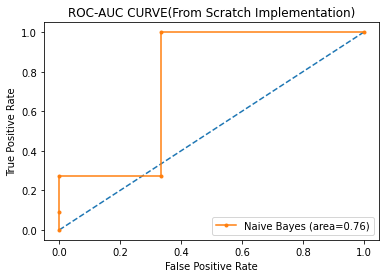

In [ ]:
plt.plot(p_fpr, p_tpr, linestyle='--')
plt.plot(fpr, tpr, marker='.', label='Naive Bayes (area=%0.2f)'% auc_score)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC-AUC CURVE(From Scratch Implementation)")
plt.legend()
plt.show()